<a href="https://colab.research.google.com/github/CesarGastelu/Actividad_3/blob/main/Actividad_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_2020 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2020', skiprows=5)
df_2021 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2021', skiprows=3)
df_2022 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2022', skiprows=3)
df_2023 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2023', skiprows=3)

In [4]:
data1 = df_2020[['TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX', 'TOTAL SAT', 'Columna1']]
data2 = df_2021[['TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX', 'TOTAL SAT']]
data3 = df_2022[['TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA', 'Otros', 'TOTAL MX', 'TOTAL SAT']]
data4 = df_2023[['FP', 'TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA', 'Otros', 'TOTAL MX', 'TOTAL SAT']]

In [5]:
data1 = data1.fillna(method = 'ffill')
data2 = data2.fillna(method = 'ffill')
data3 = data3.fillna(method = 'ffill')
data4 = data4.fillna(method = 'bfill')
data3['Otros'] = data3['Otros'].fillna(0)
data4['Otros'] = data4['Otros'].fillna(0)

In [6]:
print(data1.isnull().sum().sum())
print(data2.isnull().sum().sum())
print(data3.isnull().sum().sum())
print(data4.isnull().sum().sum())

0
0
0
1


<Figure size 500x1000 with 0 Axes>

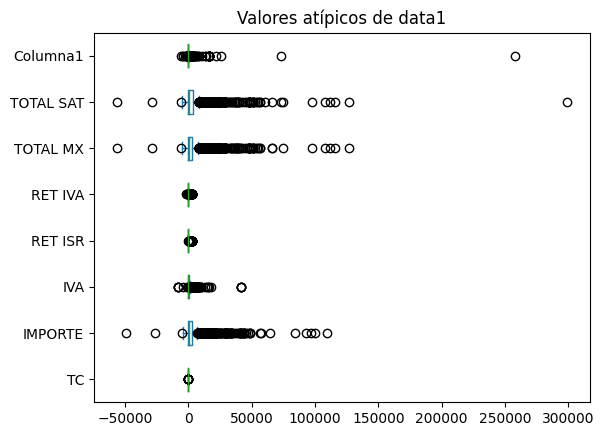

In [7]:
fig = plt.figure(figsize=(5,10))
data1.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data1')
plt.show()

<Figure size 1500x800 with 0 Axes>

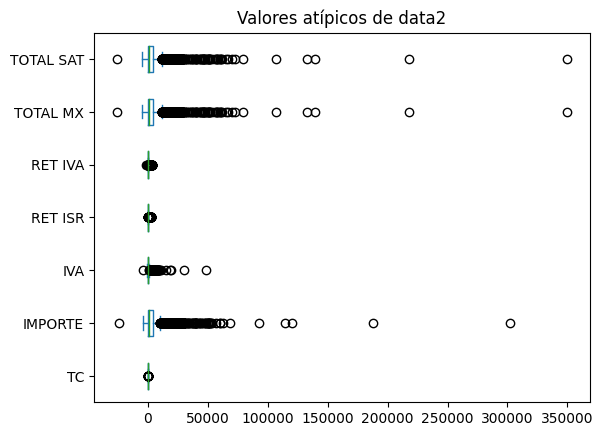

In [8]:
fig = plt.figure(figsize=(15,8))
data2.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data2')
plt.show()

<Figure size 1500x800 with 0 Axes>

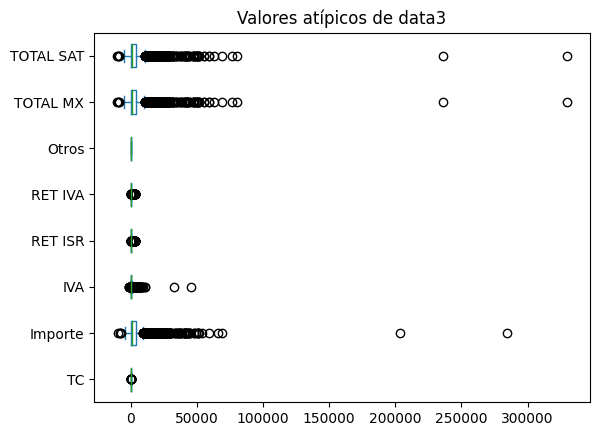

In [9]:
fig = plt.figure(figsize=(15,8))
data3.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data3')
plt.show()

<Figure size 1500x800 with 0 Axes>

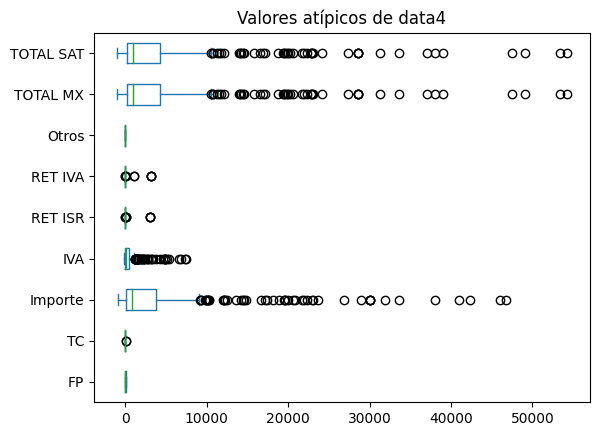

In [10]:
fig = plt.figure(figsize=(15,8))
data4.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data4')
plt.show()

In [11]:
y = data1
limiteSuperior = y.mean() + 3 * y.std()
limiteInferior = y.mean() - 3 * y.std()
data1_2 = data1[(y <= limiteSuperior) & (y >= limiteInferior)]
data1_2.isnull().sum().sum()

332

In [12]:
y = data2
limiteSuperior = y.mean() + 3 * y.std()
limiteInferior = y.mean() - 3 * y.std()
data2_2 = data2[(y <= limiteSuperior) & (y >= limiteInferior)]
data2_2.isnull().sum().sum()

298

In [13]:
y = data3
limiteSuperior = y.mean() + 3 * y.std()
limiteInferior = y.mean() - 3 * y.std()
data3_2 = data3[(y <= limiteSuperior) & (y >= limiteInferior)]
data3_2.isnull().sum().sum()

233

In [14]:
y = data4
limiteSuperior = y.mean() + 3 * y.std()
limiteInferior = y.mean() - 3 * y.std()
data4_2 = data4[(y <= limiteSuperior) & (y >= limiteInferior)]
data4_2.isnull().sum().sum()

57

<Figure size 500x1000 with 0 Axes>

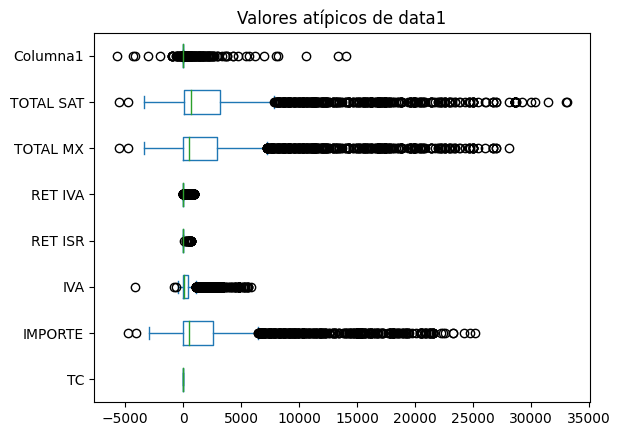

In [15]:
fig = plt.figure(figsize=(5,10))
data1_2.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data1')
plt.show()

<Figure size 500x1000 with 0 Axes>

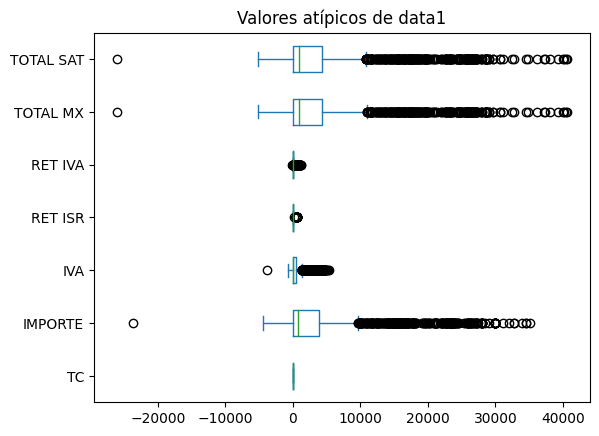

In [16]:
fig = plt.figure(figsize=(5,10))
data2_2.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data1')
plt.show()

<Figure size 500x1000 with 0 Axes>

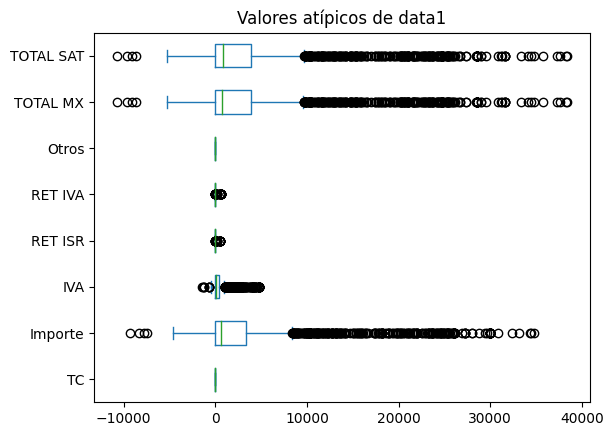

In [17]:
fig = plt.figure(figsize=(5,10))
data3_2.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data1')
plt.show()

<Figure size 500x1000 with 0 Axes>

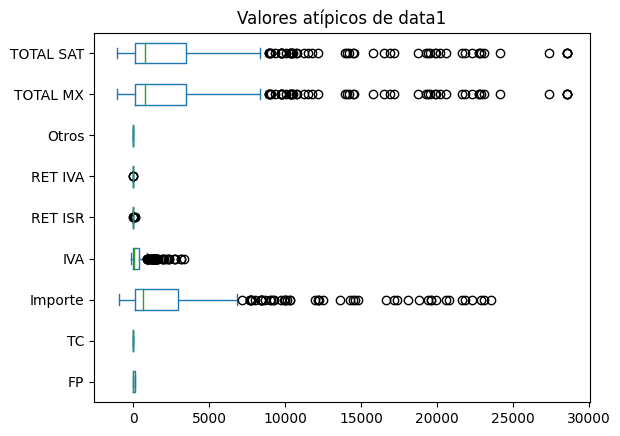

In [18]:
fig = plt.figure(figsize=(5,10))
data4_2.plot(kind = 'box', vert = False)
plt.title('Valores atípicos de data1')
plt.show()

In [19]:
data_clean_1 = data1_2.copy()
data_clean_1 = data_clean_1.fillna(round(data1_2.mean(),1))
missingData = df_2020[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO', 'DESCRIPCION', 'TIPO', 'STATUS', 'POLIZA']]
limpios1 = pd.concat([missingData, data_clean_1], axis = 1)

In [20]:
data_clean_2 = data2_2.copy()
data_clean_2 = data_clean_2.fillna(round(data2_2.median(),1))
missingData = df_2021[['FECHA', 'FOLIO', 'UUID', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'DESCRIPCION', 'MP', 'TIPO', 'STATUS', 'POLIZA']]
limpios2 = pd.concat([missingData, data_clean_1], axis = 1)

In [21]:
data_clean_3 = data3_2.copy()
data_clean_3 = data_clean_3.fillna(round(data3_2.mean(),1))
missingData = df_2022[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
limpios3 = pd.concat([missingData, data_clean_1], axis = 1)

In [25]:
data_clean_4 = data4_2.copy()
data_clean_4 = data_clean_4.fillna(round(data4_2.median(),1))
missingData = df_2023[['Fecha', 'Folio', 'UUID', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP', 'Tipo', 'Status', 'Poliza']]
limpios4 = pd.concat([missingData, data_clean_1], axis = 1)

In [28]:
from google.colab import files
limpios1.to_csv('DF_Clean_2020.csv')
limpios2.to_csv('DF_Clean_2021.csv')
limpios3.to_csv('DF_Clean_2022.csv')
limpios4.to_csv('DF_Clean_2023.csv')

files.download('DF_Clean_2020.csv')
files.download('DF_Clean_2021.csv')
files.download('DF_Clean_2022.csv')
files.download('DF_Clean_2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>